<a href="https://colab.research.google.com/github/MinsooKwak/Data_Analysis/blob/main/HR/%EC%9A%B0%EC%88%98_%EC%84%B1%EA%B3%BC%EC%9E%90%EB%93%A4%EC%9D%98_%ED%8A%B9%EC%84%B1_1%EC%B0%A8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.과제 안내

## A. Data Description

## B. Prepare Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Import**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DA_degree/과제/1주차_HR/Data/데이터분석_Expert_HR_데이터.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [4]:
print(f'총 {df.shape[1]}개의 변수로 이뤄진 {df.shape[0]}개의 데이터셋이 존재합니다.')

총 35개의 변수로 이뤄진 1470개의 데이터셋이 존재합니다.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#import missingno as msno
#%matplotlib inline
#msno.matrix(df)
#msno.bar(df)

In [8]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


**연속형 변수**

In [9]:
df.describe(include='number')[1:].T.style.background_gradient(axis=None, cmap= sns.light_palette("#2ecc71", as_cmap=True))

,mean,std,min,25%,50%,75%,max
Age,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


- EmployeeCount 항목의 값이 1로 동일. 유의미한 지표는 아님
- StandardHours 역시 모두 80인 것으로 보임 (기준 잡은 지표로 이해)

**범주형 변수**

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


- 전체 데이터셋이 over18이므로 유의미한 column은 아님

- 변수 타입 확인

  - **수치형**</br>
    Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager  
  - **범주형**</br>
    EducationField, Gender, JobRole,MaritalStatus,OverTime,
  - **순서형**</br>
    Education, EvironmentSatisfaction, JobInvolvement, Joblevel, JobSatisfaction, PerformanceRating, RelationshipSatisfcation, workLifeBalance, StockOptionLevel,
- 기타
  - Not Nessessary : Over18, EmployeeCount, StandardHours
  - Refer : EmployeeNumber (int->str)

In [11]:
# dtype 정의

# 3.HR Analysis

In [12]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


## 0.기초 분석

## A. 구성원의 업무 성과별 요인 특징

**1. 구성원의 업무 성과 현황**

- 현재 Low, Good에 대한 데이터는 없고, 성과가 비교적 좋은 사람들의 데이터 (Excellent, Outstanding)로 구성되어 있다.

In [13]:
df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

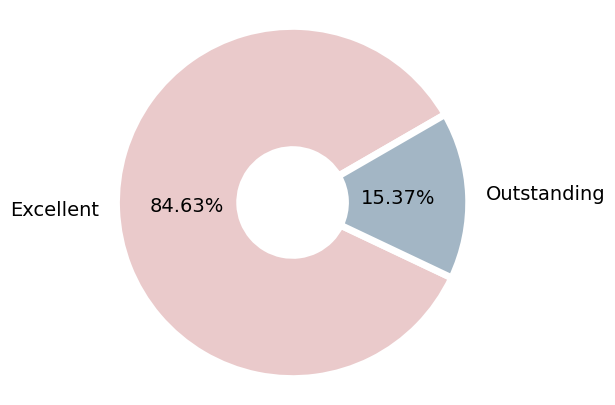

In [14]:
Performance_cat = ['Excellent','Outstanding']
Performance_sizes = df.PerformanceRating.value_counts().values
performance_group_color = ['#EACACB','#A3B6C5']
performance_group_explodes = (0.0,0.0)
fig1 = plt.figure(figsize=(5,5))
plt.pie(Performance_sizes,
        explode = performance_group_explodes,
        labels = Performance_cat,
        colors= performance_group_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=30,
        textprops={'fontsize':14})
plt.axis('equal')
plt.show()

- 현재 업무 성과가 Excellent, Oustanding 대상으로 구성되어 있다.
- Excellent 84.63%로 분석 가능한 것은 무엇이 Excellent를 넘어 Outstanding하게 하는가이다.

- 분석시에는 PerformanceRating의 비율이 치우져져 있으므로 이를 고려해 수량보다는 비율이나 분포로 확인하는 것이 좋을 것이다.

In [15]:
num_list = list(df.describe(include='number').columns)
num_list = set(num_list) - set(['EmployeeCount','StandardHours'])
num_list = list(num_list)
num_list

['HourlyRate',
 'WorkLifeBalance',
 'JobSatisfaction',
 'EmployeeNumber',
 'DailyRate',
 'TrainingTimesLastYear',
 'MonthlyRate',
 'YearsSinceLastPromotion',
 'TotalWorkingYears',
 'MonthlyIncome',
 'YearsInCurrentRole',
 'RelationshipSatisfaction',
 'YearsWithCurrManager',
 'JobInvolvement',
 'JobLevel',
 'YearsAtCompany',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'StockOptionLevel',
 'NumCompaniesWorked',
 'Age',
 'Education',
 'PercentSalaryHike',
 'PerformanceRating']

In [16]:
df2 = df[num_list]
df2.head(3)

,HourlyRate,WorkLifeBalance,JobSatisfaction,EmployeeNumber,DailyRate,TrainingTimesLastYear,MonthlyRate,YearsSinceLastPromotion,TotalWorkingYears,MonthlyIncome,...,JobLevel,YearsAtCompany,EnvironmentSatisfaction,DistanceFromHome,StockOptionLevel,NumCompaniesWorked,Age,Education,PercentSalaryHike,PerformanceRating
0,94,1,4,1,1102,0,19479,0,8,5993,...,2,6,2,1,0,8,41,2,11,3
1,61,3,2,2,279,3,24907,1,10,5130,...,2,10,3,8,1,1,49,1,23,4
2,92,3,3,4,1373,3,2396,0,7,2090,...,1,0,4,2,0,6,37,2,15,3


<Axes: >

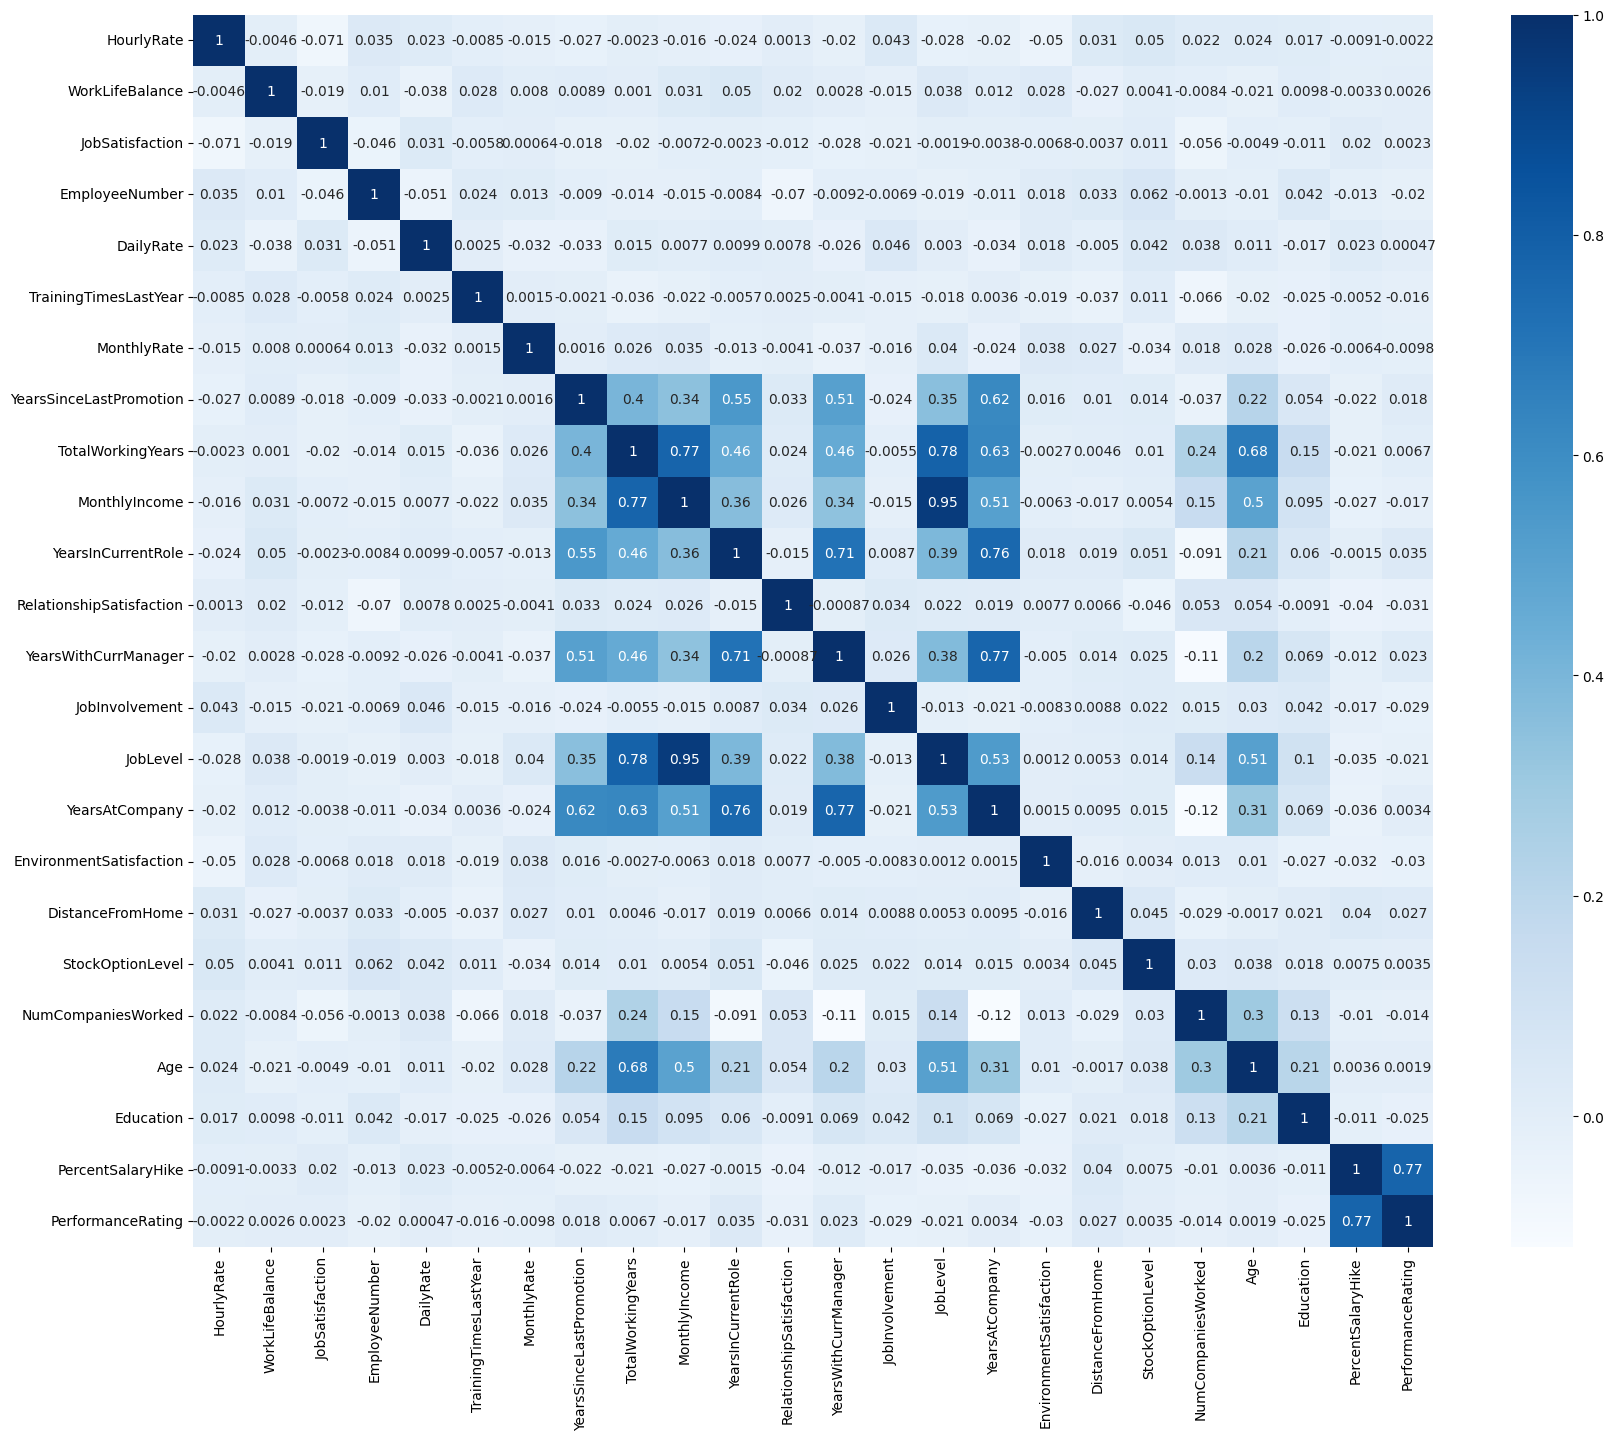

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df2.corr(), annot=True, cmap='Blues')

In [18]:
df_corr = df2.corr()
df_corr['PerformanceRating'].sort_values()

RelationshipSatisfaction   -0.031351
EnvironmentSatisfaction    -0.029548
JobInvolvement             -0.029071
Education                  -0.024539
JobLevel                   -0.021222
EmployeeNumber             -0.020359
MonthlyIncome              -0.017120
TrainingTimesLastYear      -0.015579
NumCompaniesWorked         -0.014095
MonthlyRate                -0.009811
HourlyRate                 -0.002172
DailyRate                   0.000473
Age                         0.001904
JobSatisfaction             0.002297
WorkLifeBalance             0.002572
YearsAtCompany              0.003435
StockOptionLevel            0.003506
TotalWorkingYears           0.006744
YearsSinceLastPromotion     0.017896
YearsWithCurrManager        0.022827
DistanceFromHome            0.027110
YearsInCurrentRole          0.034986
PercentSalaryHike           0.773550
PerformanceRating           1.000000
Name: PerformanceRating, dtype: float64

In [19]:
df_corr.loc[df_corr['PerformanceRating']>=0.3, 'PerformanceRating']

PercentSalaryHike    0.77355
PerformanceRating    1.00000
Name: PerformanceRating, dtype: float64

- PerformanceRating에 영향을 주는 요인은 PercentSalaryHike로 볼 수 있다.
- 나머지는 상관관계가 없다고 볼 수 있고, 추후 분석에서는 경향성 확인이 가능할 것이다.

In [20]:
df['PerformanceRating'] = df['PerformanceRating'].astype(str)

In [21]:
df_corr['PercentSalaryHike'].sort_values()

RelationshipSatisfaction   -0.040490
YearsAtCompany             -0.035991
JobLevel                   -0.034730
EnvironmentSatisfaction    -0.031701
MonthlyIncome              -0.027269
YearsSinceLastPromotion    -0.022154
TotalWorkingYears          -0.020608
JobInvolvement             -0.017205
EmployeeNumber             -0.012944
YearsWithCurrManager       -0.011985
Education                  -0.011111
NumCompaniesWorked         -0.010238
HourlyRate                 -0.009062
MonthlyRate                -0.006429
TrainingTimesLastYear      -0.005221
WorkLifeBalance            -0.003280
YearsInCurrentRole         -0.001520
Age                         0.003634
StockOptionLevel            0.007528
JobSatisfaction             0.020002
DailyRate                   0.022704
DistanceFromHome            0.040235
PerformanceRating           0.773550
PercentSalaryHike           1.000000
Name: PercentSalaryHike, dtype: float64

In [22]:
ph_df = df.PercentSalaryHike.value_counts().to_frame('counts').reset_index()
ph_df

,PercentSalaryHike,counts
0,11,210
1,13,209
2,14,201
3,12,198
4,15,101
5,18,89
6,17,82
7,16,78
8,19,76
9,22,56


<Axes: xlabel='PercentSalaryHike', ylabel='counts'>

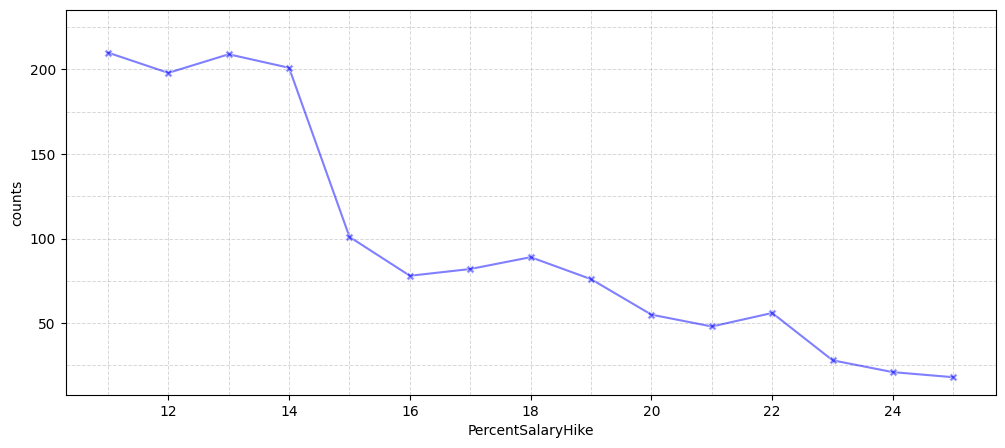

In [23]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
plt.axvline(x=11, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=12, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=13, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=14, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=15, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=16, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=17, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=18, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=19, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=20, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=21, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=22, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=23, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=24, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=25, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=25, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=75, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=125, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=150, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=175, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=200, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=225, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

sns.lineplot(ph_df, x='PercentSalaryHike',y='counts', marker='X', color='blue', alpha=0.5)

In [24]:
ph_df.corr()

,PercentSalaryHike,counts
PercentSalaryHike,1.000000,-0.926243
counts,-0.926243,1.000000


- PercentSalaryHike(급여 증가분 백분율)이 높을수록 전체에서 차지하는 수량 및 비율이 적다

In [25]:
df4 = df[['PercentSalaryHike','PerformanceRating']]
df4.head()

,PercentSalaryHike,PerformanceRating
0,11,3
1,23,4
2,15,3
3,11,3
4,12,3


<Axes: xlabel='PercentSalaryHike', ylabel='count'>

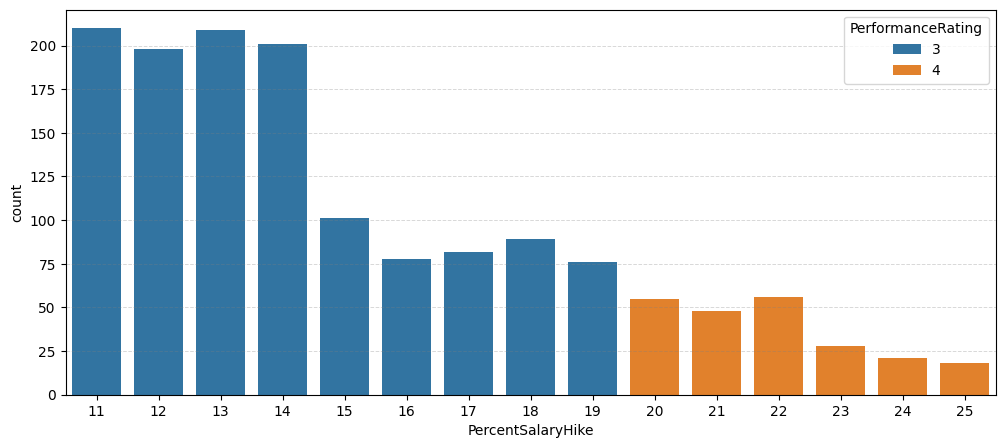

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
plt.axhline(y=25, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=75, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=125, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=150, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=175, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=200, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
sns.countplot(df4, x='PercentSalaryHike', hue='PerformanceRating')

- PercentSalaryHike를 비교한 결과 20을 기점으로 Excellent 성과와 Outstanding이 나뉘고 있음을 확인할 수 있다.
- Excellent, Outstanding할수록 급여 증가분 백분율이 증가하는 경향이 있다.

1) 경력기간 비교

In [27]:
df.groupby('PerformanceRating')['TotalWorkingYears'].mean()

PerformanceRating
3    11.257235
4    11.402655
Name: TotalWorkingYears, dtype: float64

In [28]:
df.TotalWorkingYears.mean()

11.279591836734694

**경력기간**

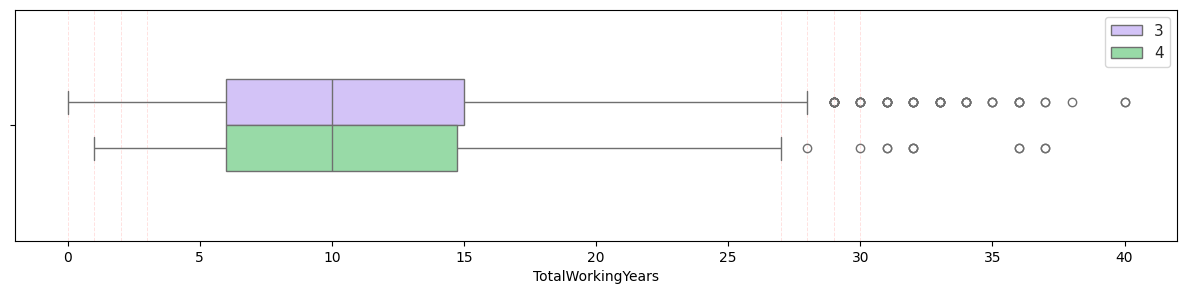

In [29]:
fig, ax = plt.subplots(1,1,figsize=(15,3))
plt.axvline(x=0, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=1, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=27, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=28, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=29, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=30, color='r', linewidth=0.7, linestyle='--', alpha=0.3)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(df, x='TotalWorkingYears',hue='PerformanceRating',palette=["m", "g"], width=0.4)
plt.legend(bbox_to_anchor=(1,1))

- 경력기간은 유사한 형태를 보인다. 평균 역시 유사하고, 사분범위(IQR)이 6~15 정도를 보이고 있다.
- 업무 성과가 Excellent에 해당하는 사람들의 경력 기간은 최소 0, 최대 28년까지 정도로 볼 수 있다.
- 업무 성과가 Outstanding한 사람들의 경력 기간은 최소 1, 최대 27년까지로 나타나고 있다.

<Axes: xlabel='TotalWorkingYears', ylabel='PercentSalaryHike'>

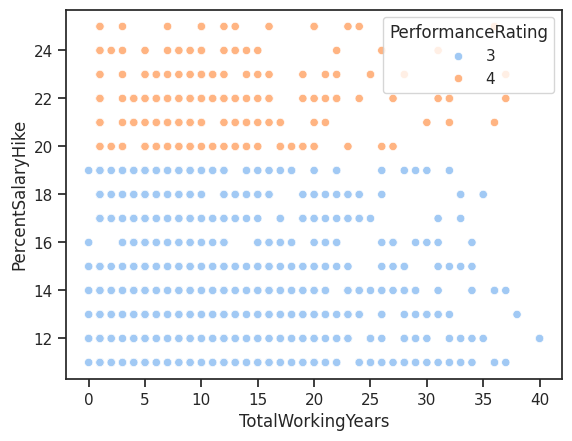

In [30]:
# 업무성과, PercentSalaryHike?
sns.scatterplot(df[['TotalWorkingYears','PercentSalaryHike', 'PerformanceRating']], x='TotalWorkingYears', y='PercentSalaryHike', hue='PerformanceRating')

2) 일과 생활의 균형 정도

In [31]:
df.WorkLifeBalance.value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [32]:
total_balance_df = pd.DataFrame(df.WorkLifeBalance.value_counts(normalize=True)).reset_index()
total_balance_df.columns = ['work_life_balance', 'total_percent']
total_balance_df.sort_values(by='work_life_balance')

,work_life_balance,total_percent
3,1,0.054422
1,2,0.234014
0,3,0.607483
2,4,0.104082


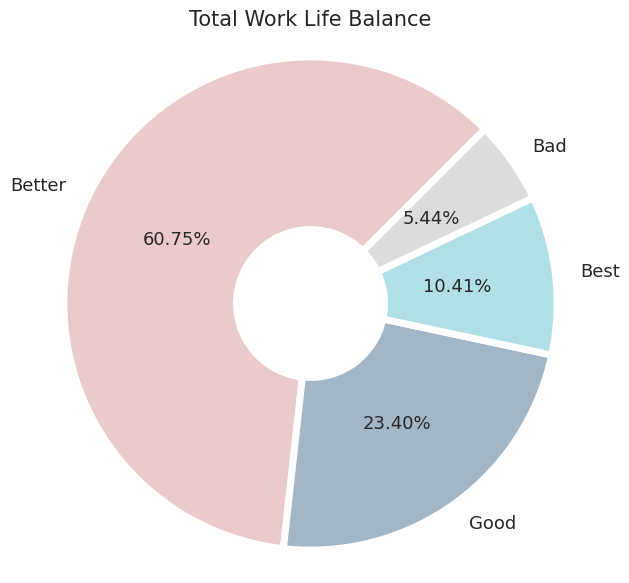

In [33]:
w_b_cat = ['Better','Good','Best','Bad']
work_bal_sizes = df.WorkLifeBalance.value_counts().values
work_bal_color = ['#EACACB','#A3B6C5','#b0e0e6','#DCDCDC']
work_bal_explodes = (0.0,0.0,0.0,0.0)

fig2 = plt.figure(figsize=(7,7))
plt.pie(work_bal_sizes,
        explode = work_bal_explodes,
        labels = w_b_cat,
        colors= work_bal_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=45,
        textprops={'fontsize':13})
plt.axis('equal')
plt.title('Total Work Life Balance', fontsize=15)
plt.show()

In [34]:
#print(f'Excellent {round(df.PerformanceRating.value_counts(normalize=True)*100,2)[0]} %, Outstanding {round(df.PerformanceRating.value_counts(normalize=True)*100,2)[1]} %')

In [35]:
df_ex = df[df.PerformanceRating == '3']
df_ex.WorkLifeBalance.value_counts()

WorkLifeBalance
3    752
2    296
4    130
1     66
Name: count, dtype: int64

In [36]:
excellent_balance_df = pd.DataFrame(df_ex.WorkLifeBalance.value_counts(normalize=True)).reset_index()
excellent_balance_df.columns = ['work_life_balance', 'excellent_percent']
excellent_balance_df

,work_life_balance,excellent_percent
0,3,0.604502
1,2,0.237942
2,4,0.104502
3,1,0.053055


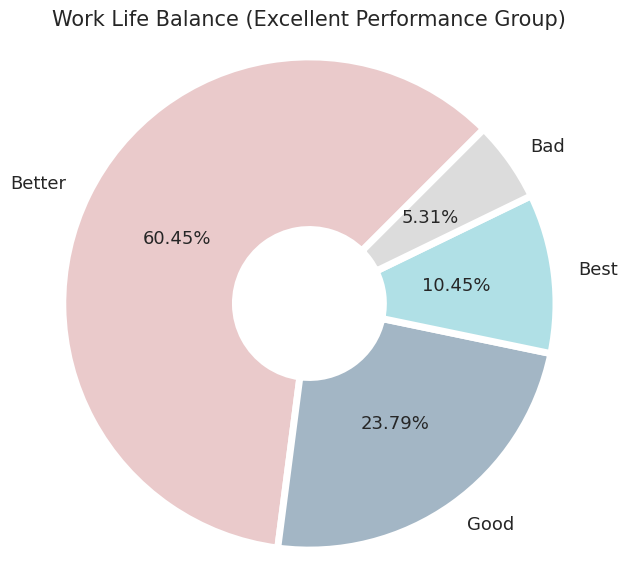

In [37]:
w_b_cat = ['Better','Good','Best','Bad']
work_bal_sizes = df_ex.WorkLifeBalance.value_counts().values
work_bal_color = ['#EACACB','#A3B6C5','#b0e0e6','#DCDCDC']
work_bal_explodes = (0.0,0.0,0.0,0.0)

fig2 = plt.figure(figsize=(7,7))
plt.pie(work_bal_sizes,
        explode = work_bal_explodes,
        labels = w_b_cat,
        colors= work_bal_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=45,
        textprops={'fontsize':13})
plt.axis('equal')
plt.title('Work Life Balance (Excellent Performance Group)', fontsize=15)
plt.show()

In [38]:
df_out = df[df.PerformanceRating == '4']
df_out.WorkLifeBalance.value_counts()

WorkLifeBalance
3    141
2     48
4     23
1     14
Name: count, dtype: int64

In [39]:
out_balance_df = pd.DataFrame(df_out.WorkLifeBalance.value_counts(normalize=True)).reset_index()
out_balance_df.columns = ['work_life_balance', 'outstanding_percent']
out_balance_df

,work_life_balance,outstanding_percent
0,3,0.623894
1,2,0.212389
2,4,0.101770
3,1,0.061947


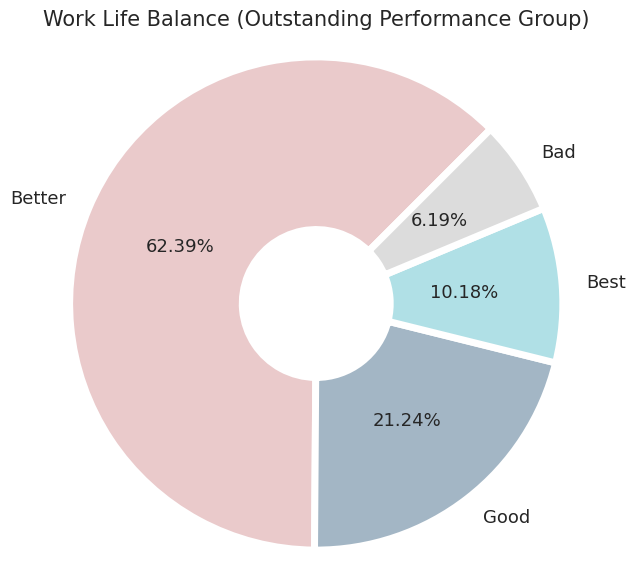

In [40]:
w_b_cat = ['Better','Good','Best','Bad']
work_bal_sizes = df_out.WorkLifeBalance.value_counts().values
work_bal_color = ['#EACACB','#A3B6C5','#b0e0e6','#DCDCDC']
work_bal_explodes = (0.0,0.0,0.0,0.0)

fig2 = plt.figure(figsize=(7,7))
plt.pie(work_bal_sizes,
        explode = work_bal_explodes,
        labels = w_b_cat,
        colors= work_bal_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=45,
        textprops={'fontsize':13})
plt.axis('equal')
plt.title('Work Life Balance (Outstanding Performance Group)', fontsize=15)
plt.show()

In [41]:
df2 = pd.merge(left = total_balance_df, right=excellent_balance_df, how='outer', on='work_life_balance')
df2 = pd.merge(left = df2, right=out_balance_df, how='outer', on='work_life_balance')
df3 = df2.sort_values(by='work_life_balance')
df3.set_index('work_life_balance', inplace=True)
df3.style.background_gradient(axis=None, cmap= sns.light_palette("#2ecc71", as_cmap=True))

,total_percent,excellent_percent,outstanding_percent
work_life_balance,,,
1,0.054422,0.053055,0.061947
2,0.234014,0.237942,0.212389
3,0.607483,0.604502,0.623894
4,0.104082,0.104502,0.101770


- 균형 정도가 Best는 아니어도, Good~Better까지는 우상향

Text(0, 0.5, 'Balance')

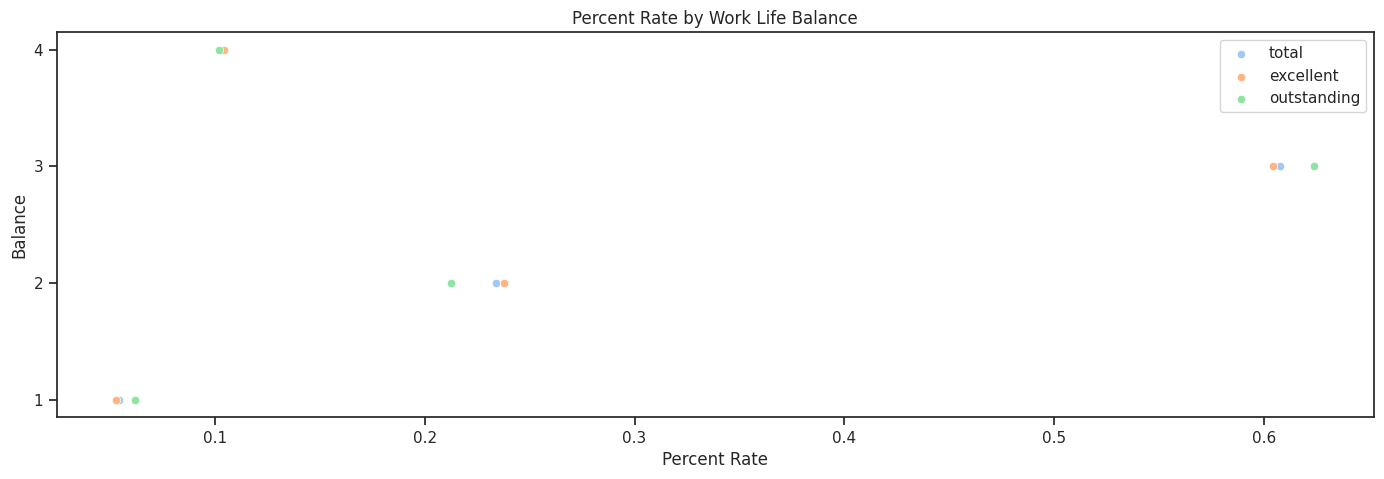

In [42]:
fig, ax = plt.subplots(1,1,figsize=(17,5))
sns.scatterplot(df3, x='total_percent', y='work_life_balance', label='total')
sns.scatterplot(df3, x='excellent_percent', y='work_life_balance', label='excellent')
sns.scatterplot(df3, x='outstanding_percent', y='work_life_balance', label='outstanding')
plt.legend(bbox_to_anchor=(1,1))
plt.yticks(np.arange(1, 5, 1))
ax.set_title('Percent Rate by Work Life Balance')
ax.set_xlabel('Percent Rate')
ax.set_ylabel('Balance')

- 1 : Bad (excellent < total < outstanding)
- 2 : Good (outstanding < total < excellent)
- 3 : Better (excellent < total < outstading)
- 4 : Best (outstanding < total < excellent)

3) 마지막 승진

In [43]:
last_pro_df = pd.DataFrame(df.YearsSinceLastPromotion.value_counts())
last_pro_df = last_pro_df.reset_index()
last_pro_df = last_pro_df.sort_values(by='YearsSinceLastPromotion')
last_pro_df

,YearsSinceLastPromotion,count
0,0,581
1,1,357
2,2,159
5,3,52
4,4,61
6,5,45
7,6,32
3,7,76
9,8,18
10,9,17


In [44]:
excel_last_pro_df = pd.DataFrame(df[df.PerformanceRating=='3'].YearsSinceLastPromotion.value_counts())
excel_last_pro_df = excel_last_pro_df.reset_index()
excel_last_pro_df = excel_last_pro_df.sort_values(by='YearsSinceLastPromotion')
excel_last_pro_df

,YearsSinceLastPromotion,count
0,0,485
1,1,309
2,2,139
5,3,44
4,4,53
6,5,34
7,6,28
3,7,65
10,8,14
8,9,17


In [45]:
super_last_pro_df = pd.DataFrame(df[df.PerformanceRating=='4'].YearsSinceLastPromotion.value_counts())
super_last_pro_df = super_last_pro_df.reset_index()
super_last_pro_df = super_last_pro_df.sort_values(by='YearsSinceLastPromotion')
super_last_pro_df

,YearsSinceLastPromotion,count
0,0,96
1,1,48
2,2,20
5,3,8
7,4,8
4,5,11
8,6,4
3,7,11
9,8,4
14,10,1


Text(0, 0.5, 'counts')

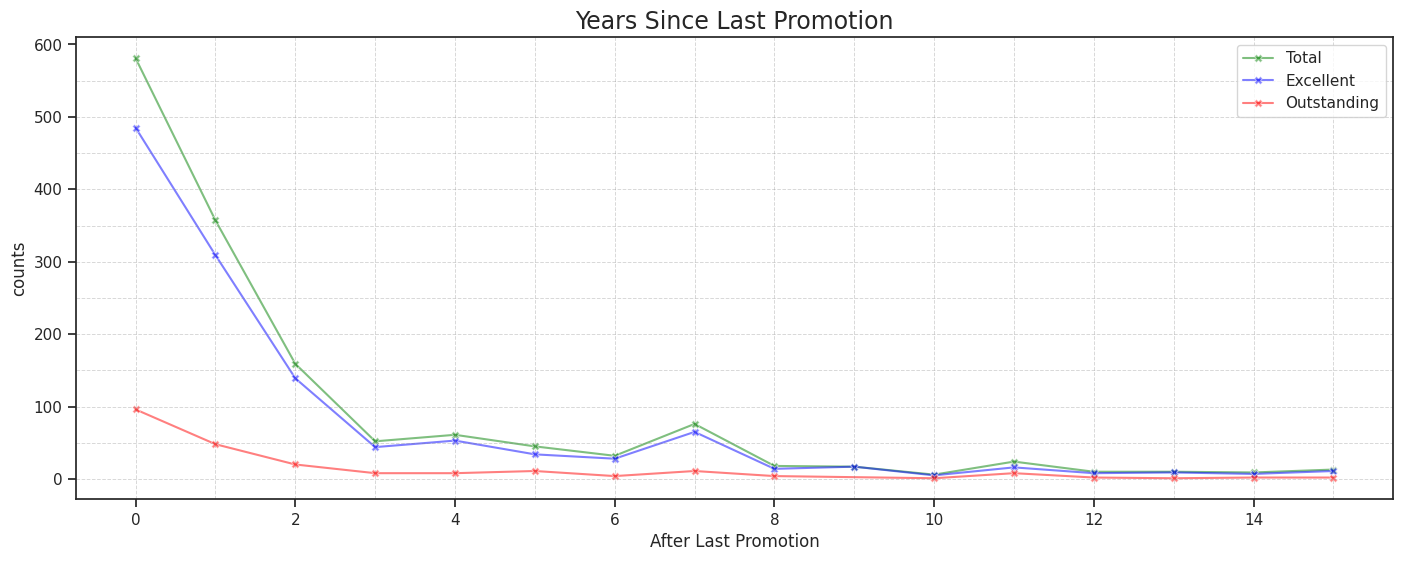

In [46]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.lineplot(last_pro_df, x='YearsSinceLastPromotion', y='count', marker='X', color='green', alpha=0.5, label='Total')
sns.lineplot(excel_last_pro_df, x='YearsSinceLastPromotion', y='count', marker='X', color='blue', alpha=0.5, label='Excellent')
sns.lineplot(super_last_pro_df, x='YearsSinceLastPromotion', y='count', marker='X', color='red', alpha=0.5, label='Outstanding')

plt.axvline(x=0, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=1, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=4, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=6, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=7, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=8, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=9, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=10, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=11, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=12, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=13, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=14, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=15, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=0, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=150, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=200, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=250, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=300, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=350, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=400, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=450, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=500, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=550, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

ax.set_title('Years Since Last Promotion', fontsize=17)
ax.set_xlabel('After Last Promotion')
ax.set_ylabel('counts')

- 마지막 승진 연수가 대부분 0~2년 사이
- 2년차 이후 특정 구간에서 승진하는 패턴
- Excellent 그룹 대비 Outstanding 그룹은 전체 패턴에 대한 영향력이 낮은 경향
- Outstanding 그룹은 마지막 승진일이 2년을 넘어가는 경우는 드문 것으로 나타난다.

Text(0, 0.5, 'counts')

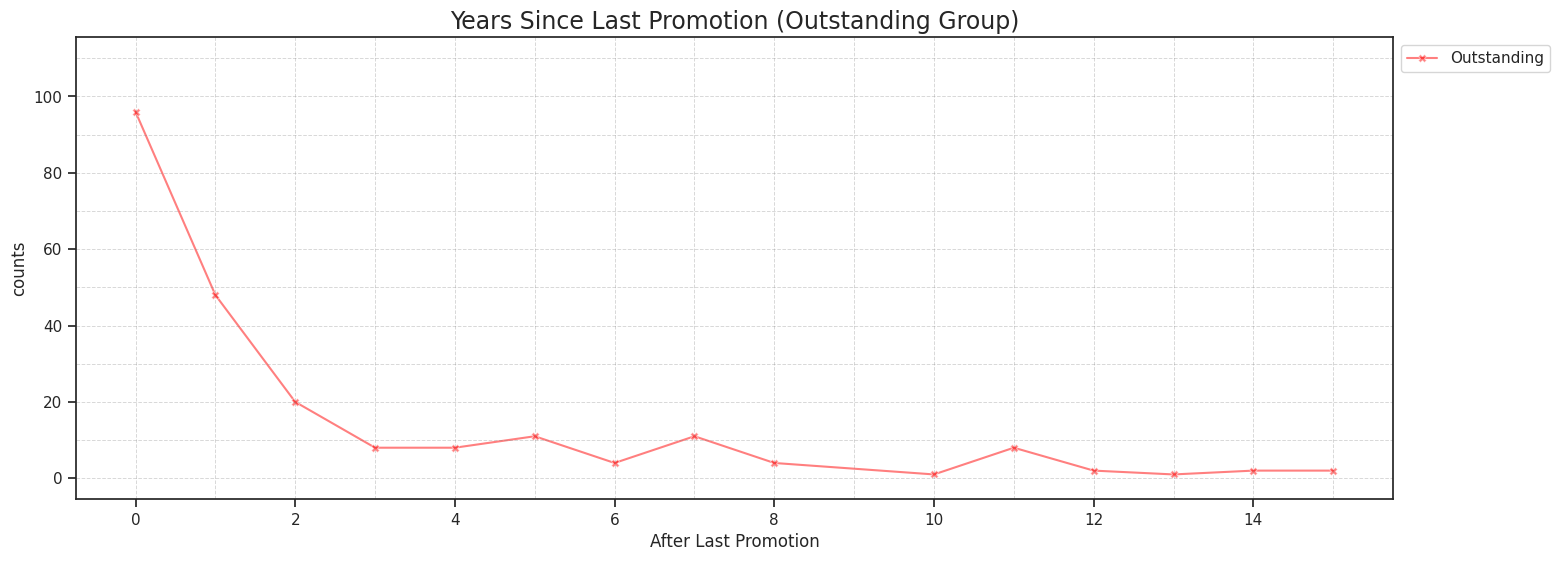

In [47]:
fig, ax = plt.subplots(1,1,figsize=(17,6))
sns.lineplot(super_last_pro_df, x='YearsSinceLastPromotion', y='count', marker='X', color='red', alpha=0.5, label='Outstanding')

plt.axvline(x=0, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=1, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=4, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=6, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=7, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=8, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=9, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=10, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=11, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=12, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=13, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=14, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=15, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=0, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=10, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=20, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=30, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=40, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=60, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=70, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=80, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=90, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=110, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1, 1))

ax.set_title('Years Since Last Promotion (Outstanding Group)', fontsize=17)
ax.set_xlabel('After Last Promotion')
ax.set_ylabel('counts')

4) 규정 외 노동시간

In [48]:
print(f'Work Overtime (No ) : {round((df.OverTime.value_counts(normalize=True)*100),2)[0]}')
print(f'Work Overtime (Yes) : {round((df.OverTime.value_counts(normalize=True)*100),2)[1]}')

Work Overtime (No ) : 71.7
Work Overtime (Yes) : 28.3


In [49]:
ex_over = df[df.PerformanceRating =='3'].OverTime.value_counts(normalize=True).to_frame('Excellent_OverTime').reset_index()
out_over = df[df.PerformanceRating =='4'].OverTime.value_counts(normalize=True).to_frame('Outstanding_OverTime').reset_index()
out_over

,OverTime,Outstanding_OverTime
0,No,0.712389
1,Yes,0.287611


In [50]:
pd.merge(ex_over,out_over, left_on='OverTime', right_on='OverTime', how='outer')

,OverTime,Excellent_OverTime,Outstanding_OverTime
0,No,0.717846,0.712389
1,Yes,0.282154,0.287611


- 유의미한 차이는 없다

5) 스톡옵션 정도

In [51]:
st_level_df = df.StockOptionLevel.value_counts().to_frame('counts').reset_index()
st_level_df

,StockOptionLevel,counts
0,0,631
1,1,596
2,2,158
3,3,85


In [52]:
st_df = df[['PerformanceRating','StockOptionLevel']]
st_df.head()

,PerformanceRating,StockOptionLevel
0,3,0
1,4,1
2,3,0
3,3,0
4,3,1


<Axes: >

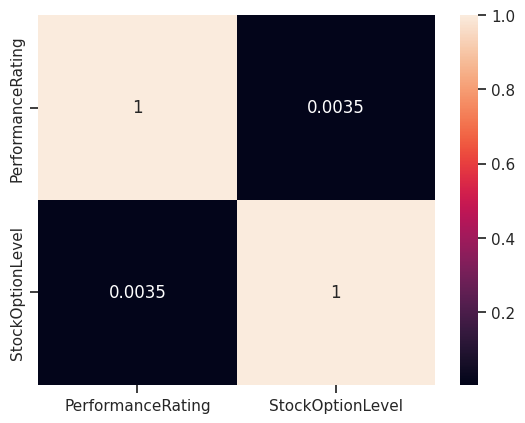

In [53]:
sns.heatmap(st_df.corr(), annot=True)

- 상관성이 있다하기 어렵다

Text(0, 0.5, 'counts')

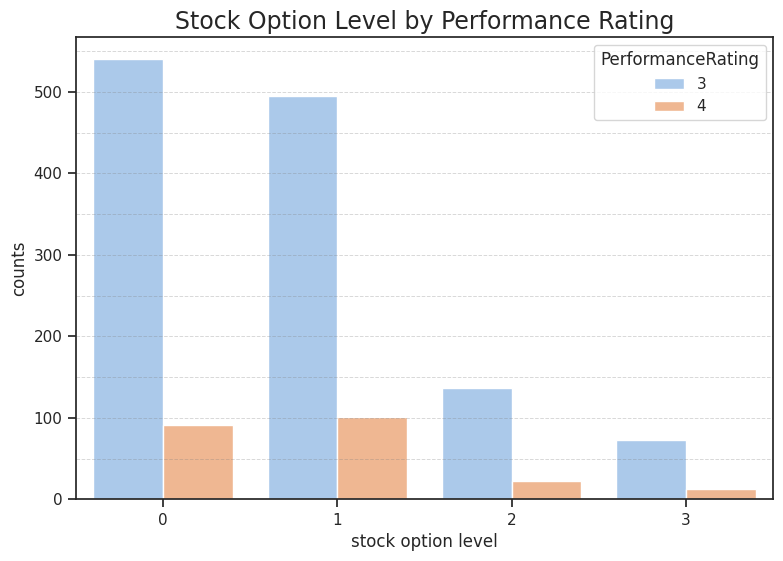

In [54]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.countplot(st_df, x='StockOptionLevel',hue='PerformanceRating')
plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=150, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=200, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=250, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=300, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=350, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=400, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=450, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=500, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=550, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

ax.set_title('Stock Option Level by Performance Rating', fontsize=17)
ax.set_xlabel('stock option level')
ax.set_ylabel('counts')

Text(0, 0.5, 'counts')

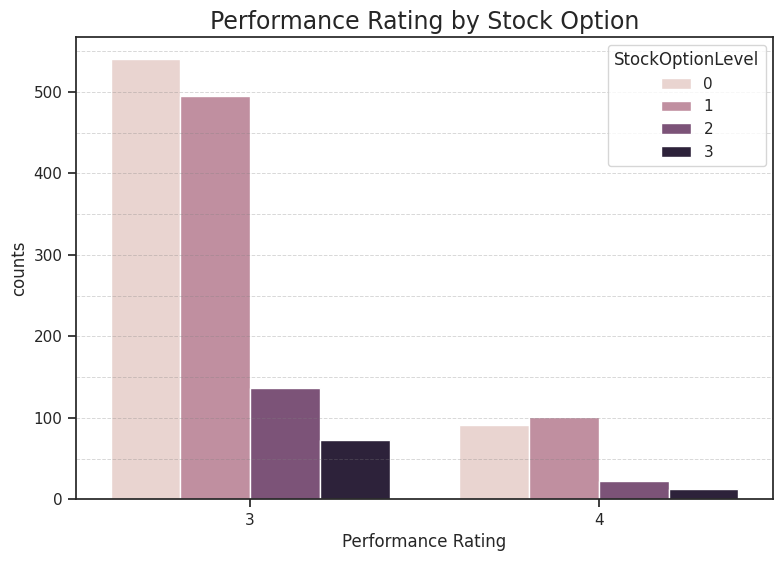

In [55]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.countplot(st_df, hue='StockOptionLevel',x='PerformanceRating')
plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=150, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=200, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=250, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=300, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=350, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=400, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=450, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=500, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=550, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

ax.set_title('Performance Rating by Stock Option', fontsize=17)
ax.set_xlabel('Performance Rating')
ax.set_ylabel('counts')

- Excellent 그룹과 Outstanding 그룹의 분포는 조금 다르게 나타나고 있다.
- Excellent 그룹은 stock option에 따라 우하향 하는 경향을 보인다.
- Oustanding 그룹의 경우 stock option에 따라 level1에서 조금 상승하는 경향을 보인다.

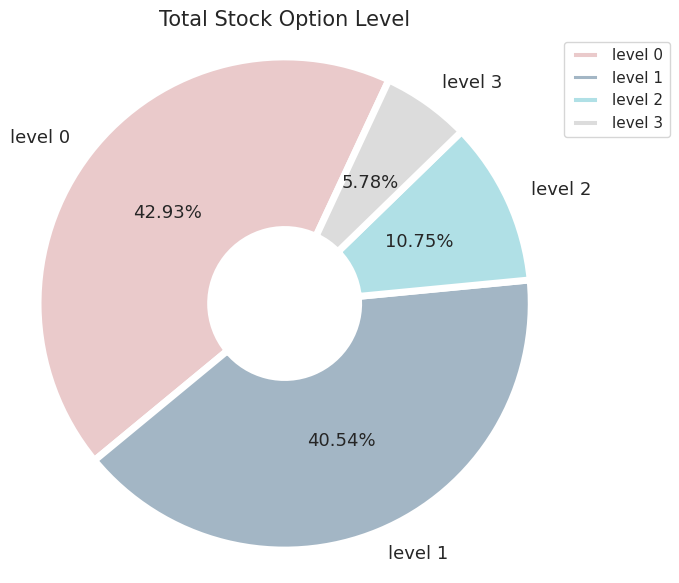

In [56]:
stock_level = ['level 0','level 1','level 2','level 3']
stock_sizes = df.StockOptionLevel.value_counts().values
stock_color = ['#EACACB','#A3B6C5','#b0e0e6','#DCDCDC']
stock_explodes = (0.0,0.0,0.0,0.0)

fig3 = plt.figure(figsize=(7,7))
plt.pie(stock_sizes,
        explode = stock_explodes,
        labels = stock_level,
        colors= stock_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=65,
        textprops={'fontsize':13})

plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Total Stock Option Level', fontsize=15)
plt.show()

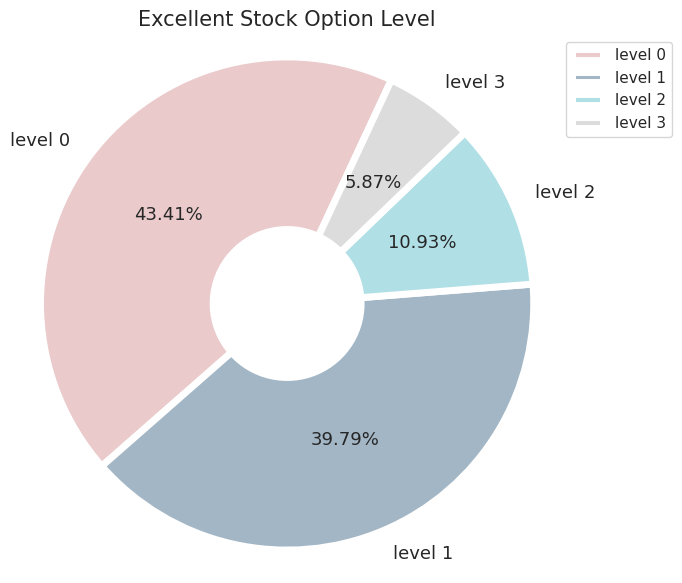

In [57]:
stock_level = ['level 0','level 1','level 2','level 3']
stock_sizes = df[df.PerformanceRating=='3'].StockOptionLevel.value_counts().values
stock_color = ['#EACACB','#A3B6C5','#b0e0e6','#DCDCDC']
stock_explodes = (0.0,0.0,0.0,0.0)

fig3 = plt.figure(figsize=(7,7))
plt.pie(stock_sizes,
        explode = stock_explodes,
        labels = stock_level,
        colors= stock_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=65,
        textprops={'fontsize':13})

plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Excellent Stock Option Level', fontsize=15)
plt.show()

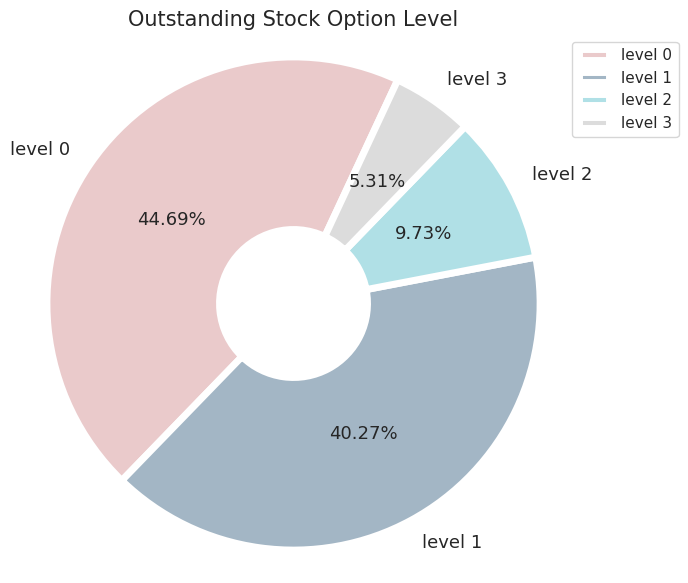

In [58]:
stock_level = ['level 0','level 1','level 2','level 3']
stock_sizes = df[df.PerformanceRating=='4'].StockOptionLevel.value_counts().values
stock_color = ['#EACACB','#A3B6C5','#b0e0e6','#DCDCDC']
stock_explodes = (0.0,0.0,0.0,0.0)

fig3 = plt.figure(figsize=(7,7))
plt.pie(stock_sizes,
        explode = stock_explodes,
        labels = stock_level,
        colors= stock_color,
        autopct='%.2f%%',
        wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5},
        shadow=False,
        startangle=65,
        textprops={'fontsize':13})

plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Outstanding Stock Option Level', fontsize=15)
plt.show()

## B. 추가 비교 대상 확인

In [59]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


<Axes: xlabel='PerformanceRating', ylabel='Age'>

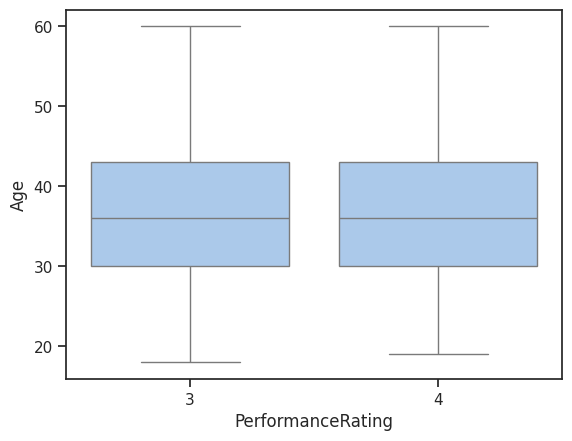

In [60]:
sns.boxplot(df, x='PerformanceRating', y='Age')

In [61]:
df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='BusinessTravel'>

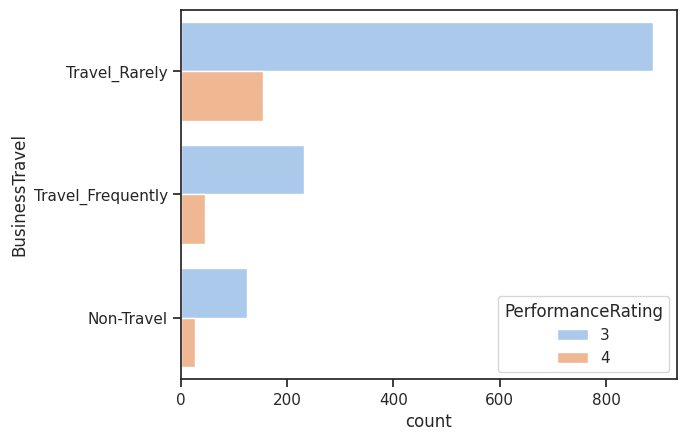

In [62]:
sns.countplot(df, y='BusinessTravel', hue='PerformanceRating')

<Axes: xlabel='count', ylabel='Department'>

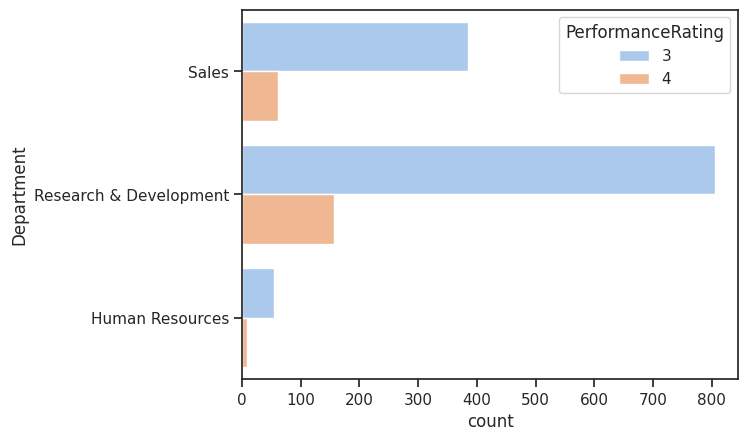

In [63]:
sns.countplot(df, y='Department', hue='PerformanceRating')

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

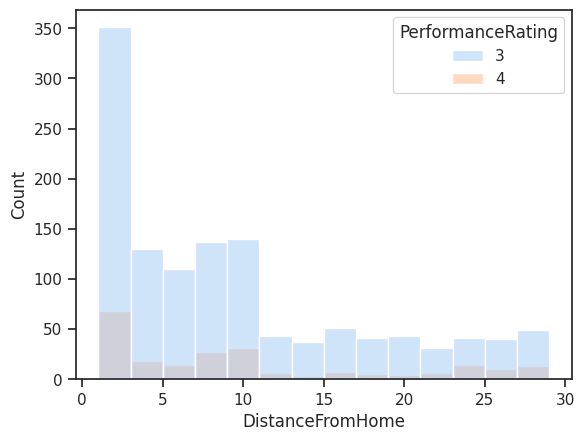

In [64]:
sns.histplot(df, x='DistanceFromHome', hue='PerformanceRating')

- 거리에 차이를 단편적으로 확인하긴 어렵다.
- 수량에 대한 차이는 있지만 분포는 비교적 유사한 것으로 보인다.
- 다만 거리와 다른 요소에 따른 차이가 있을 수 있고, 그에 따라 전체 데이터를 특정 segment로 나눌 때 특정 패턴이 도출될 수도 있을 것 같다.

In [65]:
ed_count = df.Education.value_counts().to_frame().reset_index().sort_values(by='Education', ascending=False)
ed_count

,Education,count
4,5,48
1,4,398
0,3,572
2,2,282
3,1,170


<Axes: ylabel='Education'>

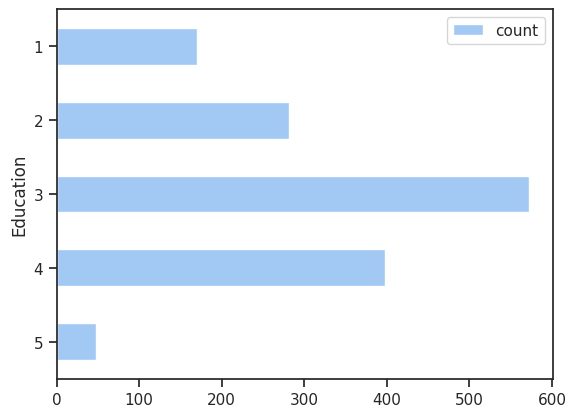

In [66]:
ed_count.plot.barh(x='Education')

In [67]:
df[['Education','PerformanceRating']].corr()

,Education,PerformanceRating
Education,1.000000,-0.024539
PerformanceRating,-0.024539,1.000000


In [68]:
edu_df = df[['Education','PerformanceRating']].value_counts().to_frame().sort_values(by='Education').reset_index()
edu_df

,Education,PerformanceRating,count
0,1,3,140
1,1,4,30
2,2,3,234
3,2,4,48
4,3,3,490
5,3,4,82
6,4,3,341
7,4,4,57
8,5,3,39
9,5,4,9


Text(0, 0.5, 'counts')

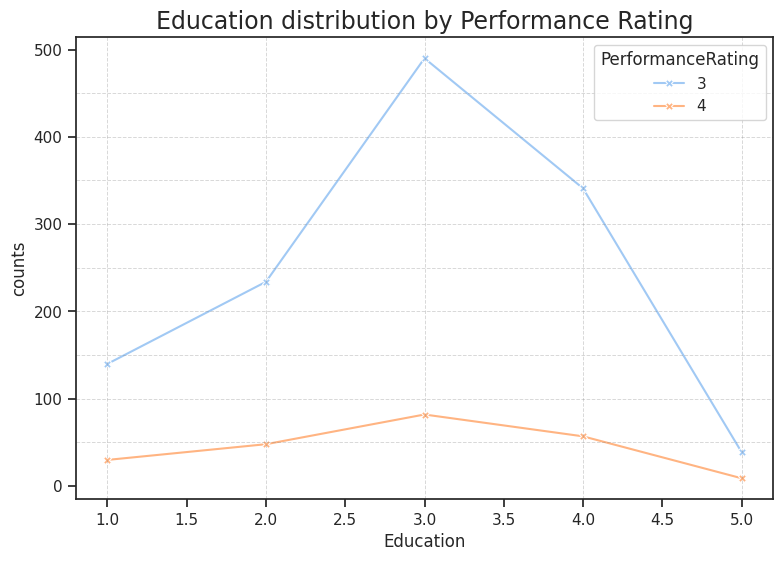

In [69]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(edu_df, x='Education', y='count', hue='PerformanceRating', marker='X')

plt.axvline(x=1, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=4, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=50, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=150, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=200, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=250, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=300, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=350, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=400, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=450, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

ax.set_title('Education distribution by Performance Rating', fontsize=17)
ax.set_xlabel('Education')
ax.set_ylabel('counts')

In [70]:
edu_df

,Education,PerformanceRating,count
0,1,3,140
1,1,4,30
2,2,3,234
3,2,4,48
4,3,3,490
5,3,4,82
6,4,3,341
7,4,4,57
8,5,3,39
9,5,4,9


In [71]:
edu_excel = edu_df[edu_df['PerformanceRating']=='3']

In [72]:
exel_sum = edu_excel['count'].sum()
exel_sum

1244

In [73]:
edu_excel['percent_by_performance'] = round((edu_excel['count']/exel_sum)*100,2)
edu_excel

<ipython-input-73-01c51573ad22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_excel['percent_by_performance'] = round((edu_excel['count']/exel_sum)*100,2)


,Education,PerformanceRating,count,percent_by_performance
0,1,3,140,11.25
2,2,3,234,18.81
4,3,3,490,39.39
6,4,3,341,27.41
8,5,3,39,3.14


In [74]:
edu_out = edu_df[edu_df['PerformanceRating']=='4']

In [75]:
edu_sum= edu_out['count'].sum()
edu_sum

226

In [76]:
edu_out['percent_by_performance'] = round((edu_out['count']/edu_sum)*100,2)
edu_out

<ipython-input-76-a42b45dde97f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_out['percent_by_performance'] = round((edu_out['count']/edu_sum)*100,2)


,Education,PerformanceRating,count,percent_by_performance
1,1,4,30,13.27
3,2,4,48,21.24
5,3,4,82,36.28
7,4,4,57,25.22
9,5,4,9,3.98


Text(0, 0.5, 'performance rating percent')

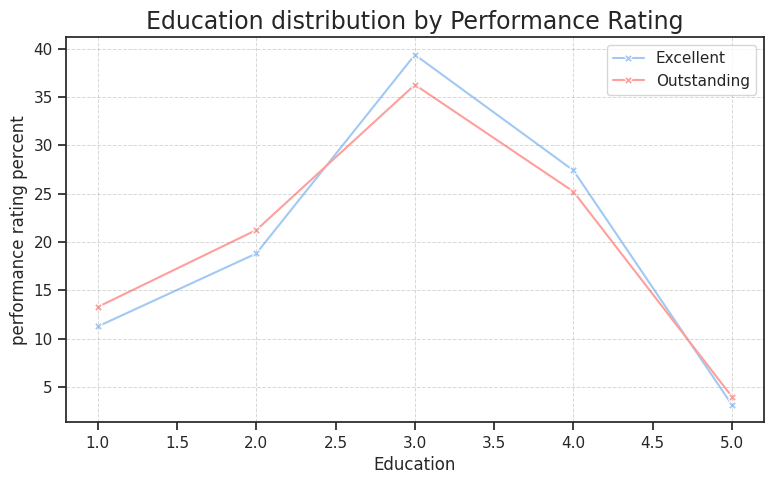

In [77]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.lineplot(edu_excel, x='Education', y='percent_by_performance', marker='X', label='Excellent', color='b')
sns.lineplot(edu_out, x='Education', y='percent_by_performance', marker='X', label='Outstanding', color='r')

plt.axvline(x=1, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=4, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=10, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=15, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=20, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=25, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=30, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=35, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=40, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

ax.set_title('Education distribution by Performance Rating', fontsize=17)
ax.set_xlabel('Education')
ax.set_ylabel('performance rating percent')

- Education에 따른 업무 성과 영향은 크게 없는 것으로 보인다.
- 패턴 역시 전체 경향과 유사하게 나타난다.

In [78]:
env_sat = df.EnvironmentSatisfaction.value_counts().to_frame().sort_values(by='EnvironmentSatisfaction').reset_index()
env_sat

,EnvironmentSatisfaction,count
0,1,284
1,2,287
2,3,453
3,4,446


<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

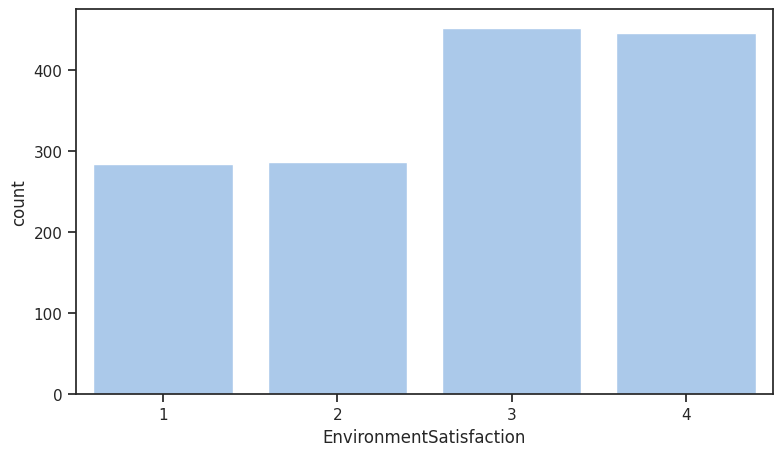

In [79]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.barplot(env_sat, x='EnvironmentSatisfaction', y='count', color='b')

In [80]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

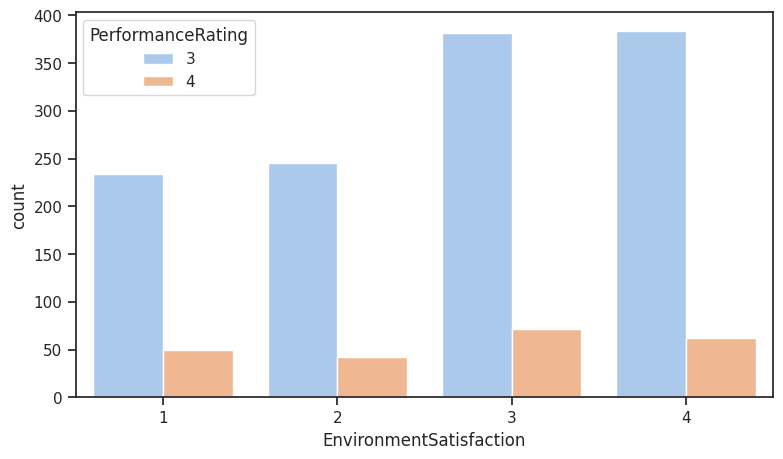

In [81]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.countplot(df, x='EnvironmentSatisfaction', hue='PerformanceRating')

In [82]:
env_per = df[['PerformanceRating','EnvironmentSatisfaction']].value_counts().to_frame().reset_index()
env_per

,PerformanceRating,EnvironmentSatisfaction,count
0,3,4,384
1,3,3,381
2,3,2,245
3,3,1,234
4,4,3,72
5,4,4,62
6,4,1,50
7,4,2,42


In [83]:
excel_env_per = env_per[env_per['PerformanceRating']=='3']
excel_env_per['percent'] = round((excel_env_per['count']/(excel_env_per['count'].sum()))*100,2)
excel_env_per

<ipython-input-83-4e867952b7f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excel_env_per['percent'] = round((excel_env_per['count']/(excel_env_per['count'].sum()))*100,2)


,PerformanceRating,EnvironmentSatisfaction,count,percent
0,3,4,384,30.87
1,3,3,381,30.63
2,3,2,245,19.69
3,3,1,234,18.81


In [84]:
out_env_per = env_per[env_per['PerformanceRating']=='4']
out_env_per['percent'] = round((out_env_per['count']/(out_env_per['count'].sum()))*100,2)
out_env_per

<ipython-input-84-f66668cb5386>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_env_per['percent'] = round((out_env_per['count']/(out_env_per['count'].sum()))*100,2)


,PerformanceRating,EnvironmentSatisfaction,count,percent
4,4,3,72,31.86
5,4,4,62,27.43
6,4,1,50,22.12
7,4,2,42,18.58


Text(0, 0.5, 'percent by performance')

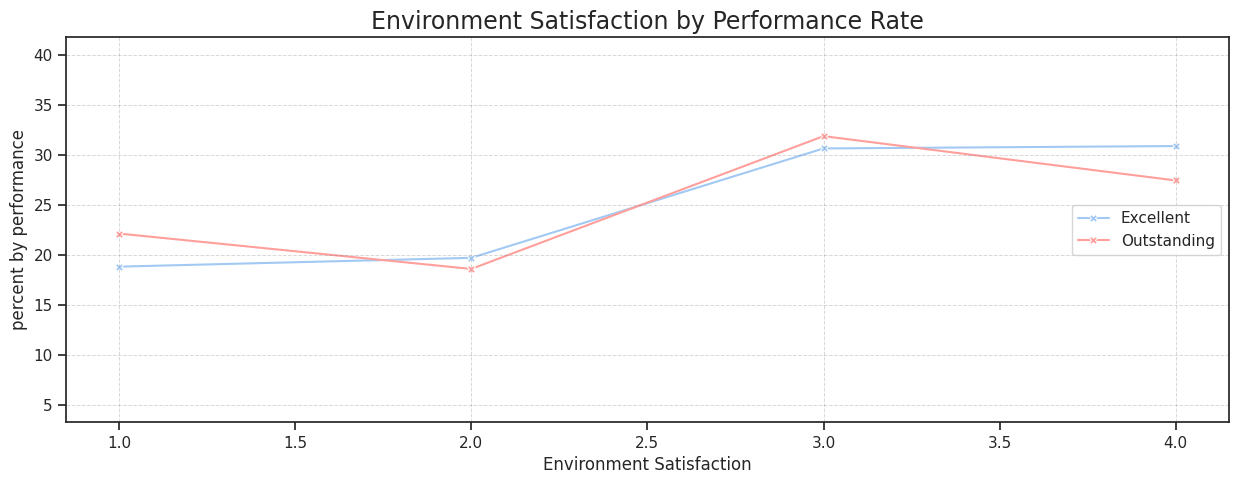

In [85]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(excel_env_per, x='EnvironmentSatisfaction', y='percent', marker='X', label='Excellent', color='b')
sns.lineplot(out_env_per, x='EnvironmentSatisfaction', y='percent', marker='X', label='Outstanding', color='r')

plt.axvline(x=1, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=4, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=10, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=15, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=20, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=25, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=30, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=35, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=40, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
#plt.legend(bbox_to_anchor=(1, 1))

ax.set_title('Environment Satisfaction by Performance Rate', fontsize=17)
ax.set_xlabel('Environment Satisfaction')
ax.set_ylabel('percent by performance')

- 업무 만족도 역시 유사하게 나타나고 있다. 상관관계는 없다고 볼 수 있다.
- Excellent 그룹 대비 Outstanding 그룹이 만족도 3에서 가장 높고, 4에서는 떨어지는 경향을 보인다.

- 만족도가 낮은 그룹과 높은 그룹의 segment를 비교할 수 있을 것 같다. (추후 분석)

In [86]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

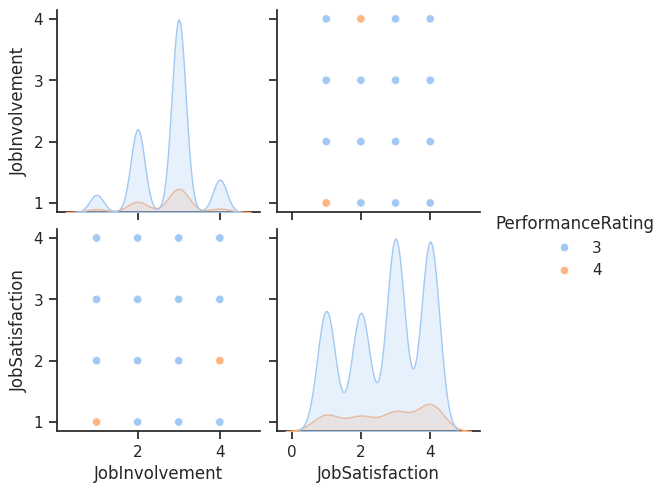

In [87]:
sns.pairplot(df[['JobInvolvement','PerformanceRating','JobSatisfaction']], hue='PerformanceRating')

In [88]:
df.JobSatisfaction.value_counts().to_frame().sort_values(by='JobSatisfaction').style.background_gradient(axis=None, cmap= sns.light_palette("#2ecc71", as_cmap=True))

,count
JobSatisfaction,
1,289
2,280
3,442
4,459


In [89]:
job_sat = df[['PerformanceRating','JobSatisfaction']].value_counts().to_frame().reset_index()
job_sat

,PerformanceRating,JobSatisfaction,count
0,3,3,386
1,3,4,380
2,3,1,241
3,3,2,237
4,4,4,79
5,4,3,56
6,4,1,48
7,4,2,43


In [90]:
excel_jobsat_per = job_sat[job_sat['PerformanceRating']=='3']
excel_jobsat_per['percent'] = round((excel_jobsat_per['count']/(excel_jobsat_per['count'].sum()))*100,2)
excel_jobsat_per

<ipython-input-90-d0104af1406c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excel_jobsat_per['percent'] = round((excel_jobsat_per['count']/(excel_jobsat_per['count'].sum()))*100,2)


,PerformanceRating,JobSatisfaction,count,percent
0,3,3,386,31.03
1,3,4,380,30.55
2,3,1,241,19.37
3,3,2,237,19.05


In [91]:
out_jobsat_per = job_sat[job_sat['PerformanceRating']=='4']
out_jobsat_per['percent'] = round((out_jobsat_per['count']/(out_jobsat_per['count'].sum()))*100,2)
out_jobsat_per

<ipython-input-91-85709672c0c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_jobsat_per['percent'] = round((out_jobsat_per['count']/(out_jobsat_per['count'].sum()))*100,2)


,PerformanceRating,JobSatisfaction,count,percent
4,4,4,79,34.96
5,4,3,56,24.78
6,4,1,48,21.24
7,4,2,43,19.03


Text(0, 0.5, 'percent by performance')

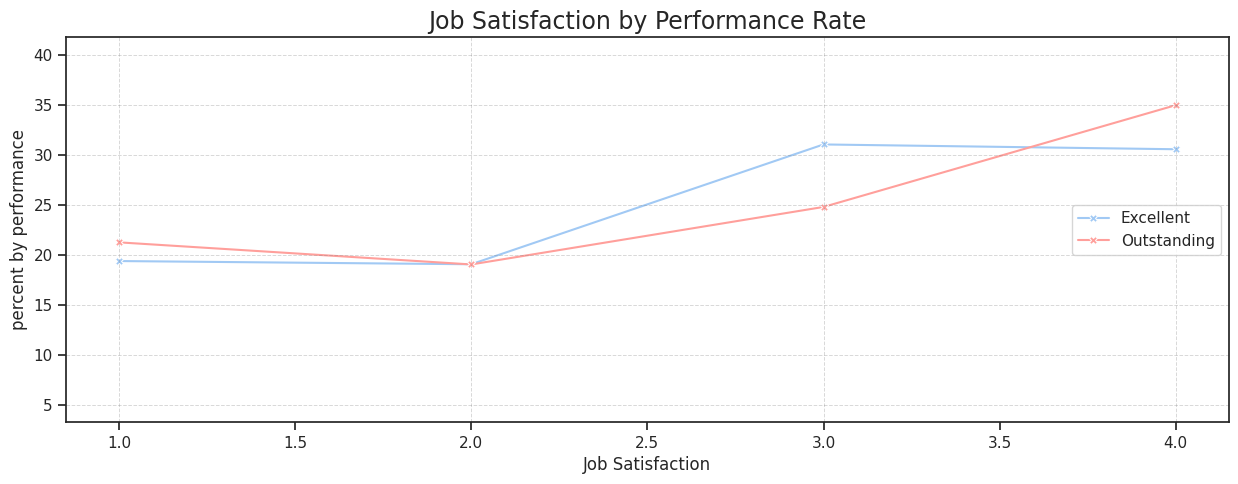

In [92]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(excel_jobsat_per, x='JobSatisfaction', y='percent', marker='X', label='Excellent', color='b')
sns.lineplot(out_jobsat_per, x='JobSatisfaction', y='percent', marker='X', label='Outstanding', color='r')

plt.axvline(x=1, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=2, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=3, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axvline(x=4, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)

plt.axhline(y=5, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=10, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=15, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=20, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=25, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=30, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=35, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
plt.axhline(y=40, color='gray', linewidth=0.7, linestyle='--', alpha=0.3)
#plt.legend(bbox_to_anchor=(1, 1))

ax.set_title('Job Satisfaction by Performance Rate', fontsize=17)
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('percent by performance')